In [1]:
import wiggum as wg
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r'data\data_dep_indep_data')

In [4]:
data

,Unnamed: 0,times,data,function,trial,version,number_cluster,num_splitby,dep_indep_vars
0,0,0.074260,synthetic 1000,cct,0,v1,2,4,4
1,1,0.073000,synthetic 1000,cct,1,v1,2,4,4
2,2,0.075688,synthetic 1000,cct,2,v1,2,4,4
3,3,0.072313,synthetic 1000,cct,3,v1,2,4,4
4,4,0.072156,synthetic 1000,cct,4,v1,2,4,4
...,...,...,...,...,...,...,...,...,...
10795,75,5.569162,synthetic 10000,get_trends (sub),5,v2,32,16,16
10796,76,5.567002,synthetic 10000,get_trends (sub),6,v2,32,16,16
10797,77,5.566064,synthetic 10000,get_trends (sub),7,v2,32,16,16
10798,78,5.568460,synthetic 10000,get_trends (sub),8,v2,32,16,16


In [6]:
data=data.drop(labels=['Unnamed: 0'], axis=1)

In [7]:
data

,times,data,function,trial,version,number_cluster,num_splitby,dep_indep_vars
0,0.074260,synthetic 1000,cct,0,v1,2,4,4
1,0.073000,synthetic 1000,cct,1,v1,2,4,4
2,0.075688,synthetic 1000,cct,2,v1,2,4,4
3,0.072313,synthetic 1000,cct,3,v1,2,4,4
4,0.072156,synthetic 1000,cct,4,v1,2,4,4
...,...,...,...,...,...,...,...,...
10795,5.569162,synthetic 10000,get_trends (sub),5,v2,32,16,16
10796,5.567002,synthetic 10000,get_trends (sub),6,v2,32,16,16
10797,5.566064,synthetic 10000,get_trends (sub),7,v2,32,16,16
10798,5.568460,synthetic 10000,get_trends (sub),8,v2,32,16,16


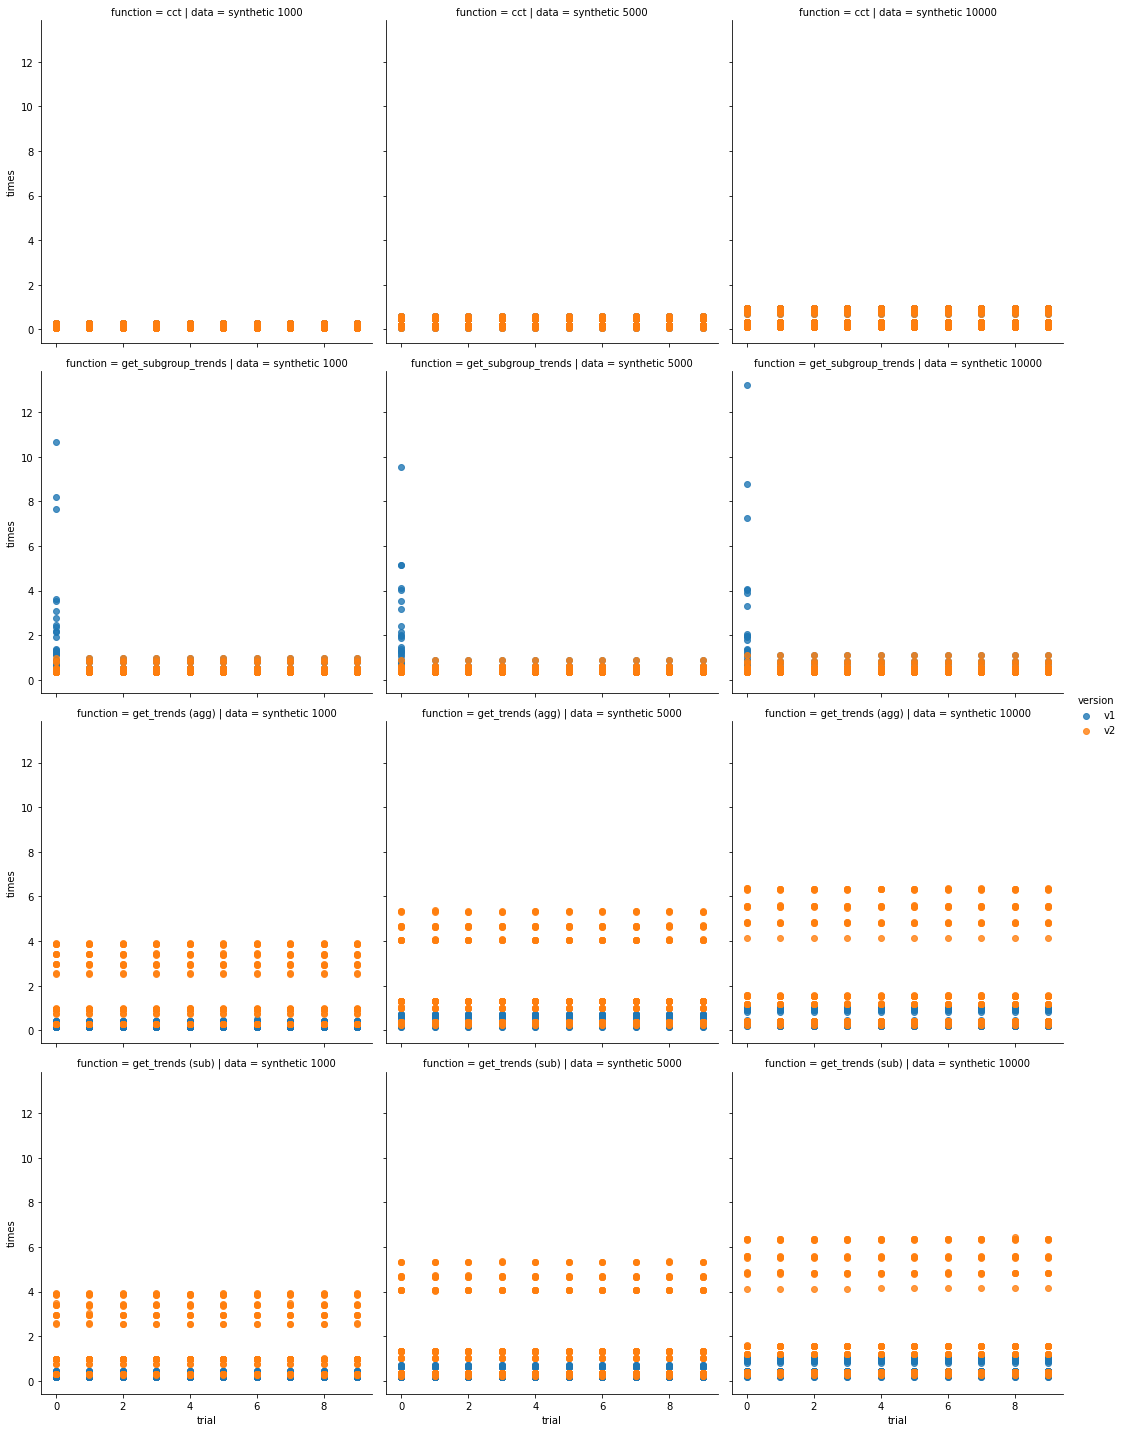

In [9]:
sns.lmplot(data=data, x='trial', y='times', col='data', row='function', hue='version', fit_reg=False)

Note: for whatever reason in get_subgroup_trends() for version 1 the first trial always has much higher timings ans they seem to increase with the number of clusters.

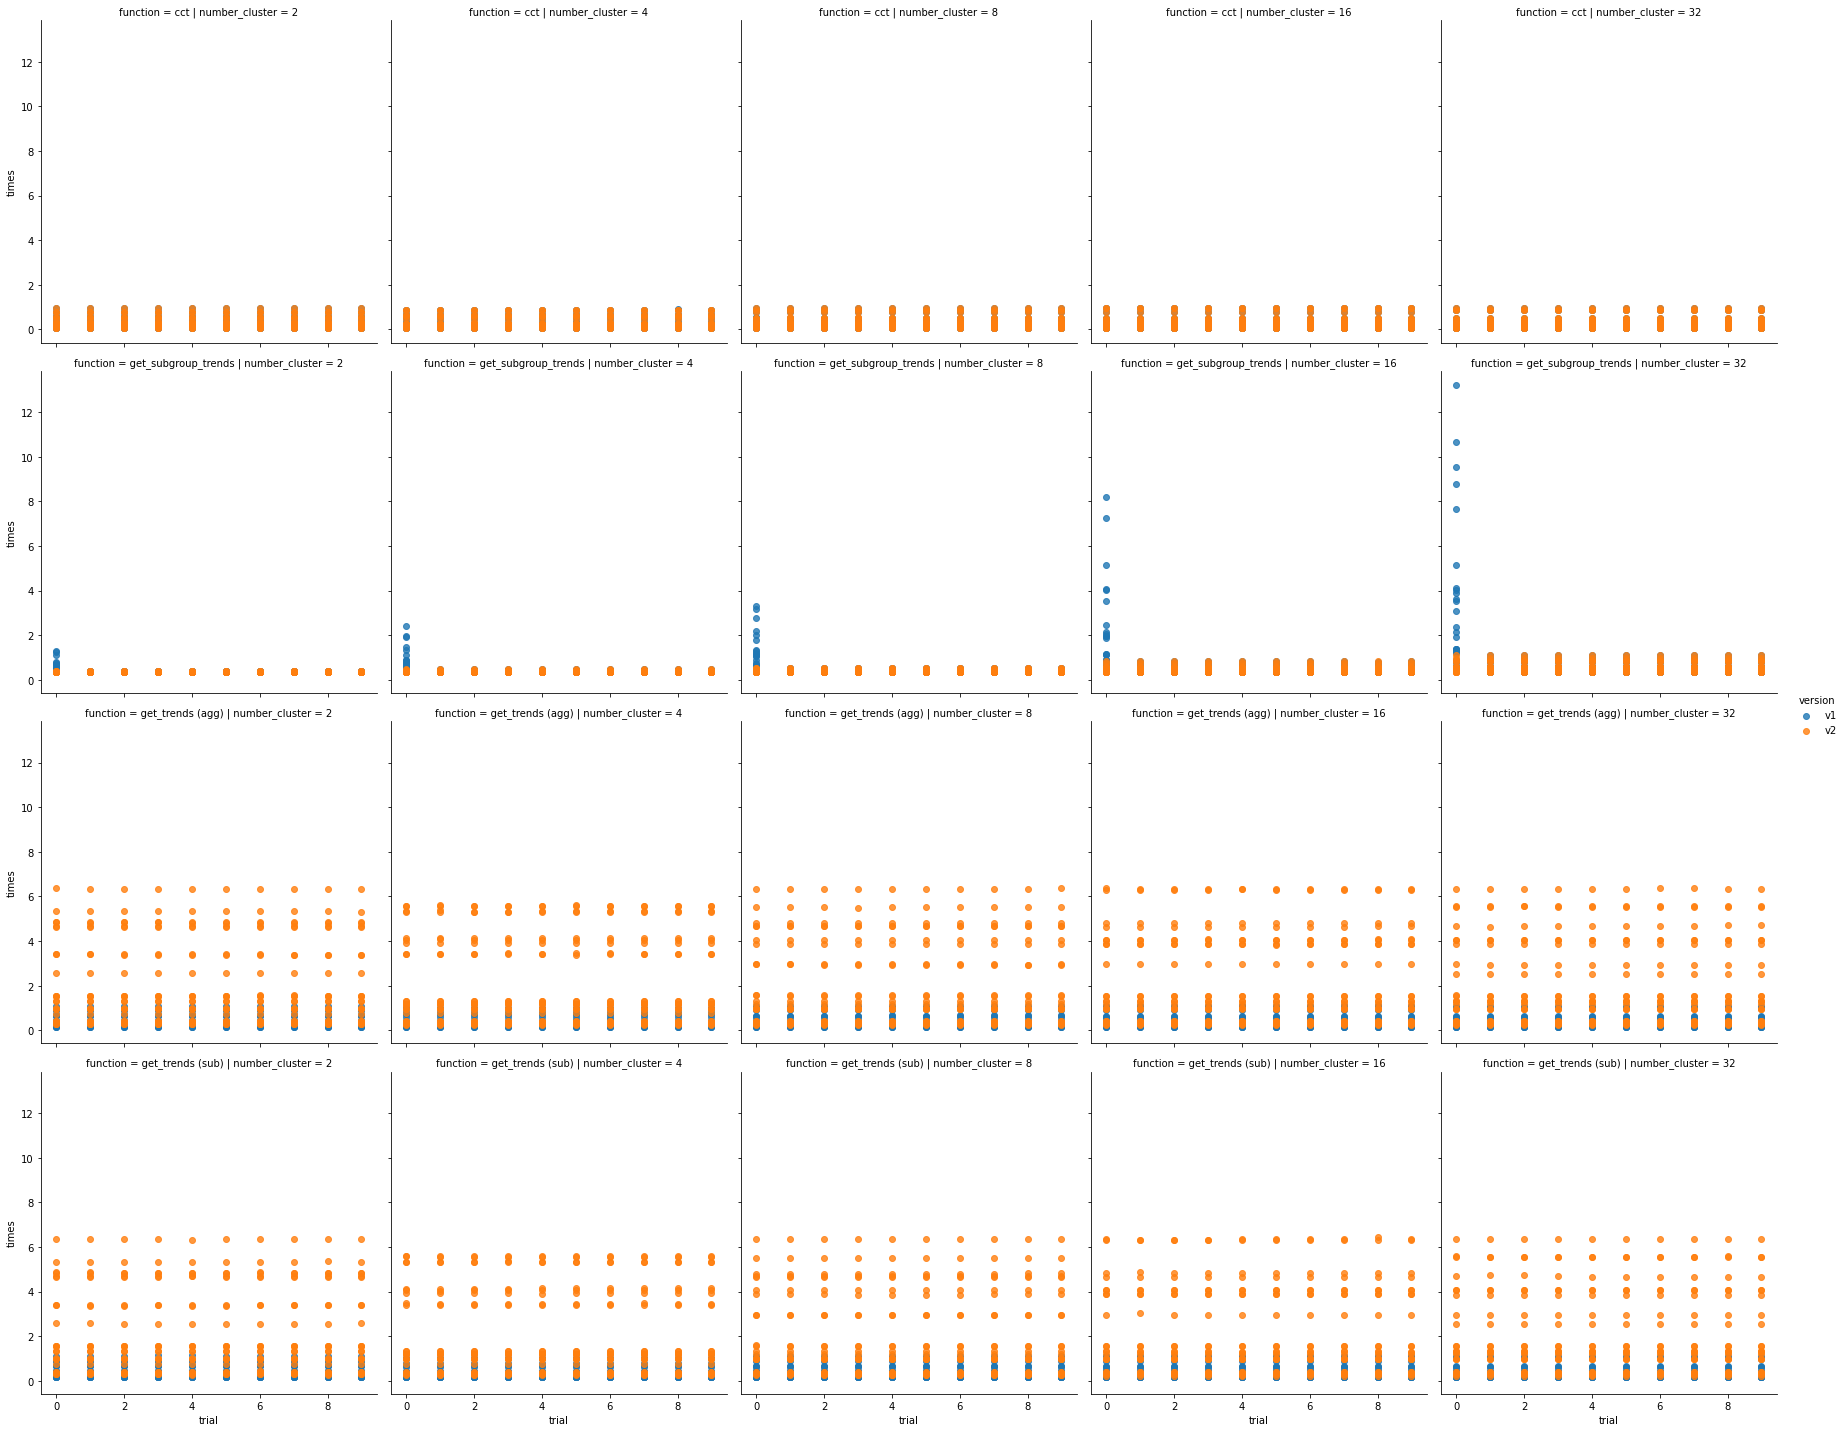

In [10]:
sns.lmplot(data=data, x='trial', y='times', col='number_cluster', row='function', hue='version', fit_reg=False)

In [11]:
data_mean=data.groupby(['function', 'version', 'data', 'dep_indep_vars', 'number_cluster', 'num_splitby']).mean()
data_mean=data_mean.reset_index()
data_mean

,function,version,data,dep_indep_vars,number_cluster,num_splitby,times,trial
0,cct,v1,synthetic 1000,4,2,4,0.072673,4.5
1,cct,v1,synthetic 1000,4,2,8,0.071773,4.5
2,cct,v1,synthetic 1000,4,2,16,0.071909,4.5
3,cct,v1,synthetic 1000,4,4,4,0.072344,4.5
4,cct,v1,synthetic 1000,4,4,8,0.072542,4.5
...,...,...,...,...,...,...,...,...
1075,get_trends (sub),v2,synthetic 5000,16,16,8,4.648722,4.5
1076,get_trends (sub),v2,synthetic 5000,16,16,16,4.054331,4.5
1077,get_trends (sub),v2,synthetic 5000,16,32,4,4.061621,4.5
1078,get_trends (sub),v2,synthetic 5000,16,32,8,4.066027,4.5


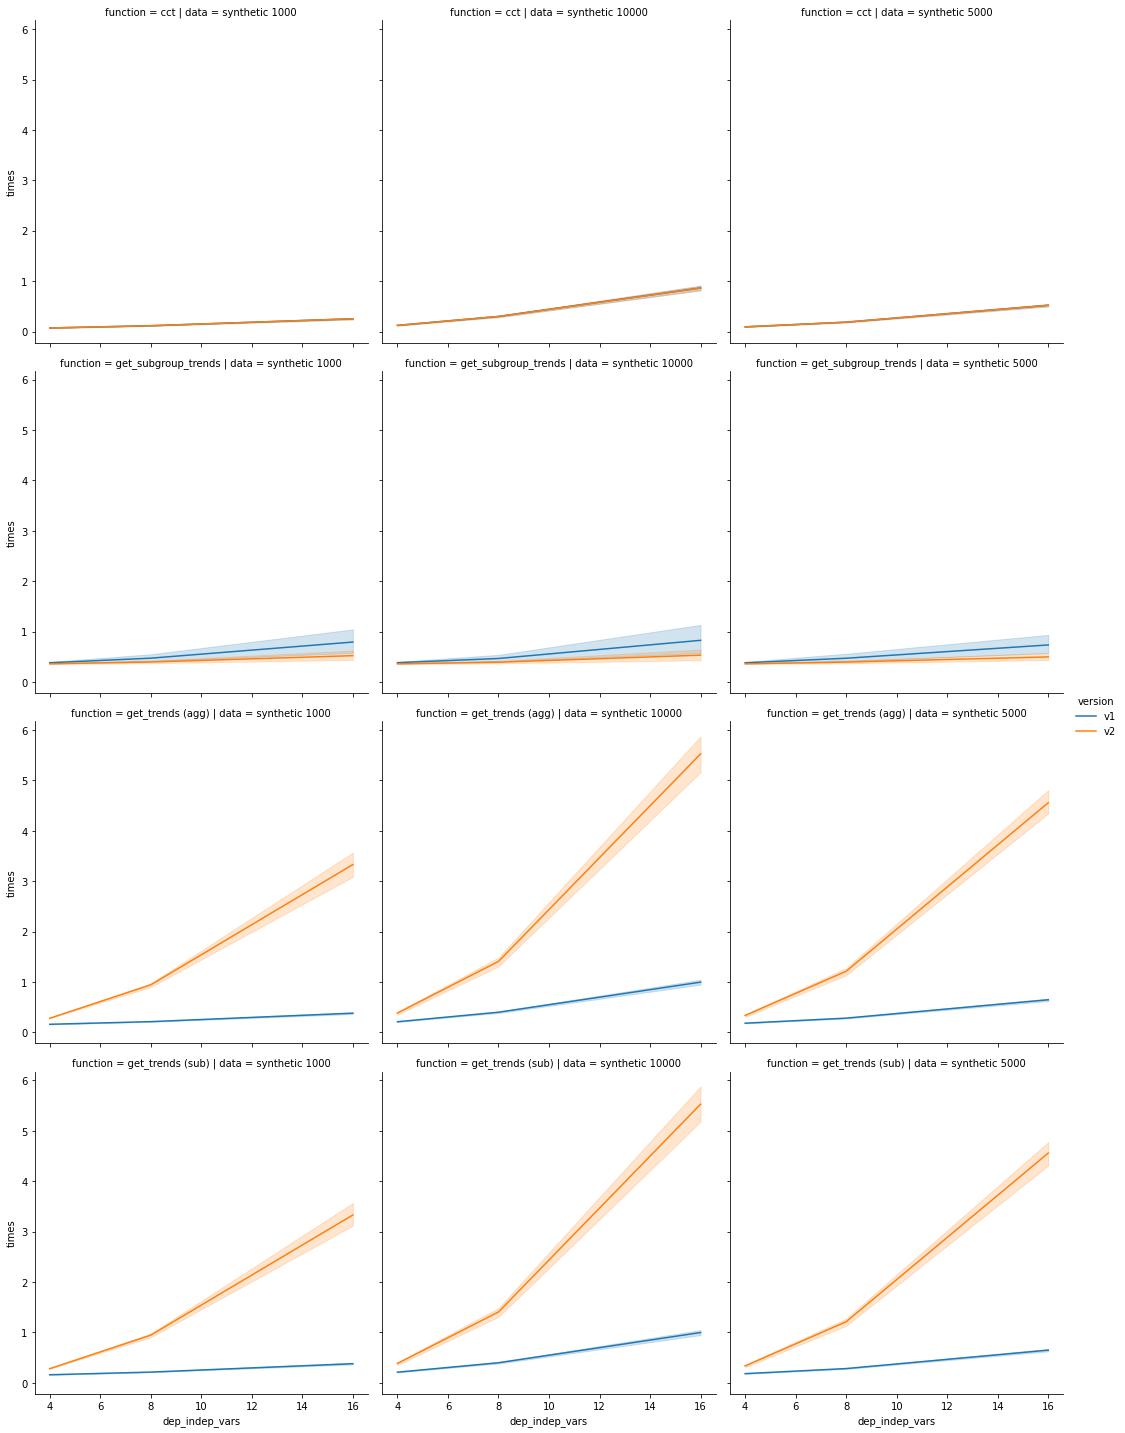

In [12]:
sns.relplot(data=data_mean, x='dep_indep_vars', y='times', kind='line', col='data', row='function', hue='version')

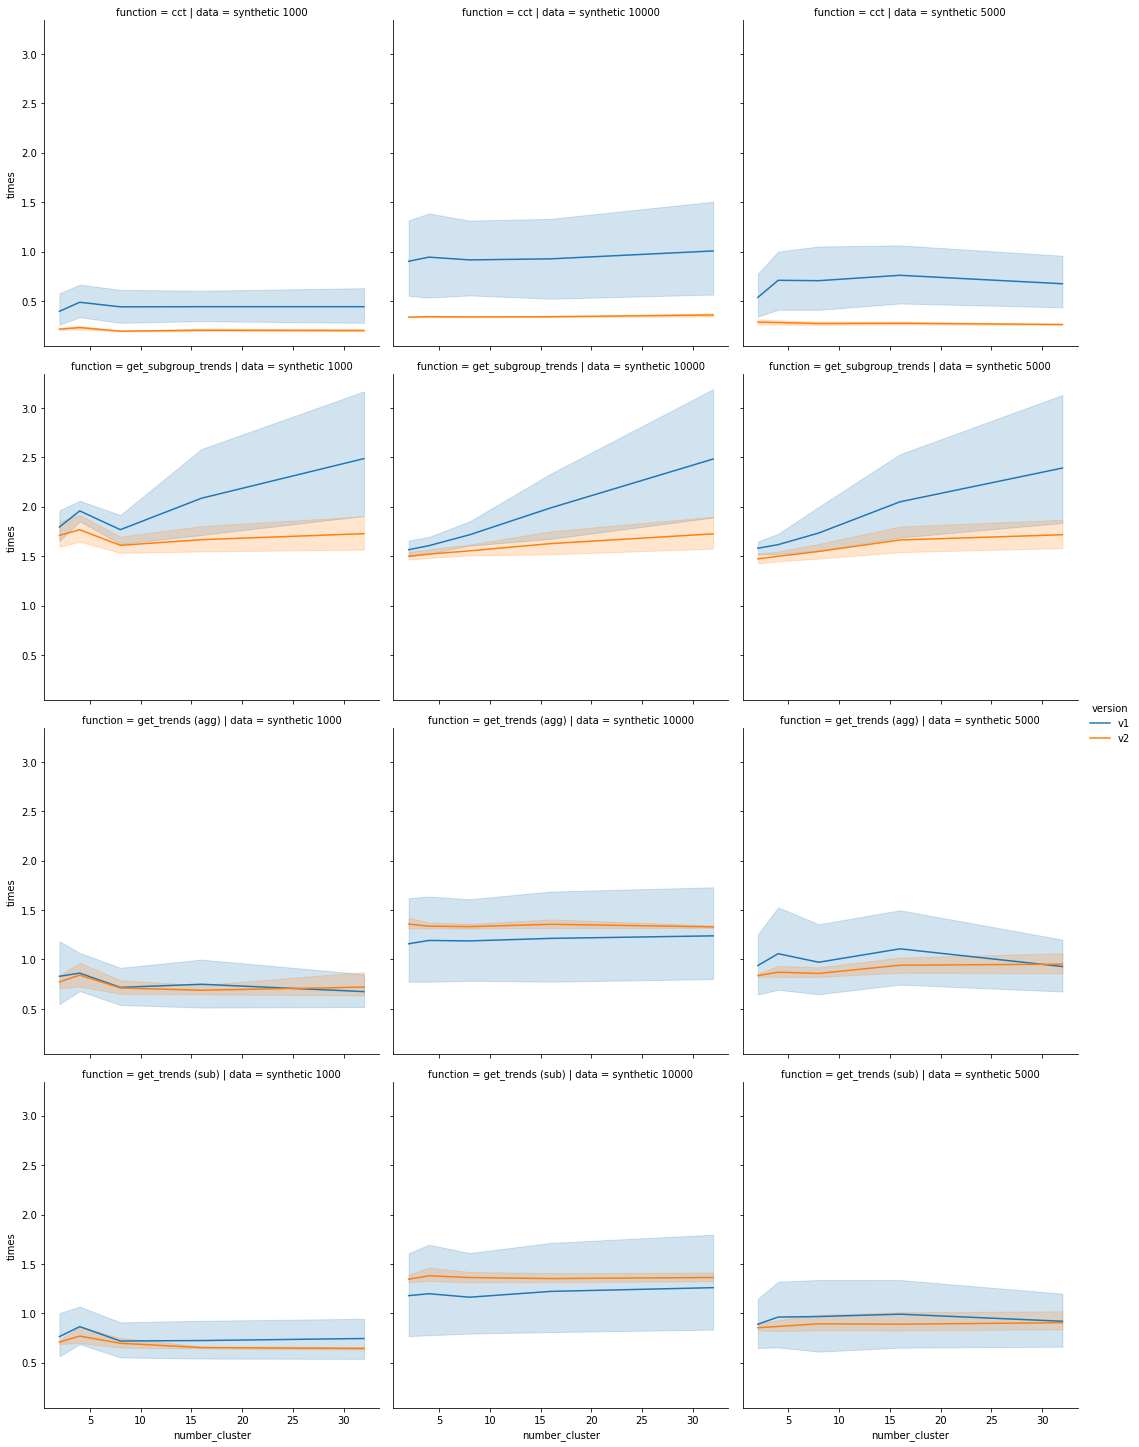

In [103]:
sns.relplot(data=data_mean, x='number_cluster', y='times', kind='line', col='data', row='function', hue='version')

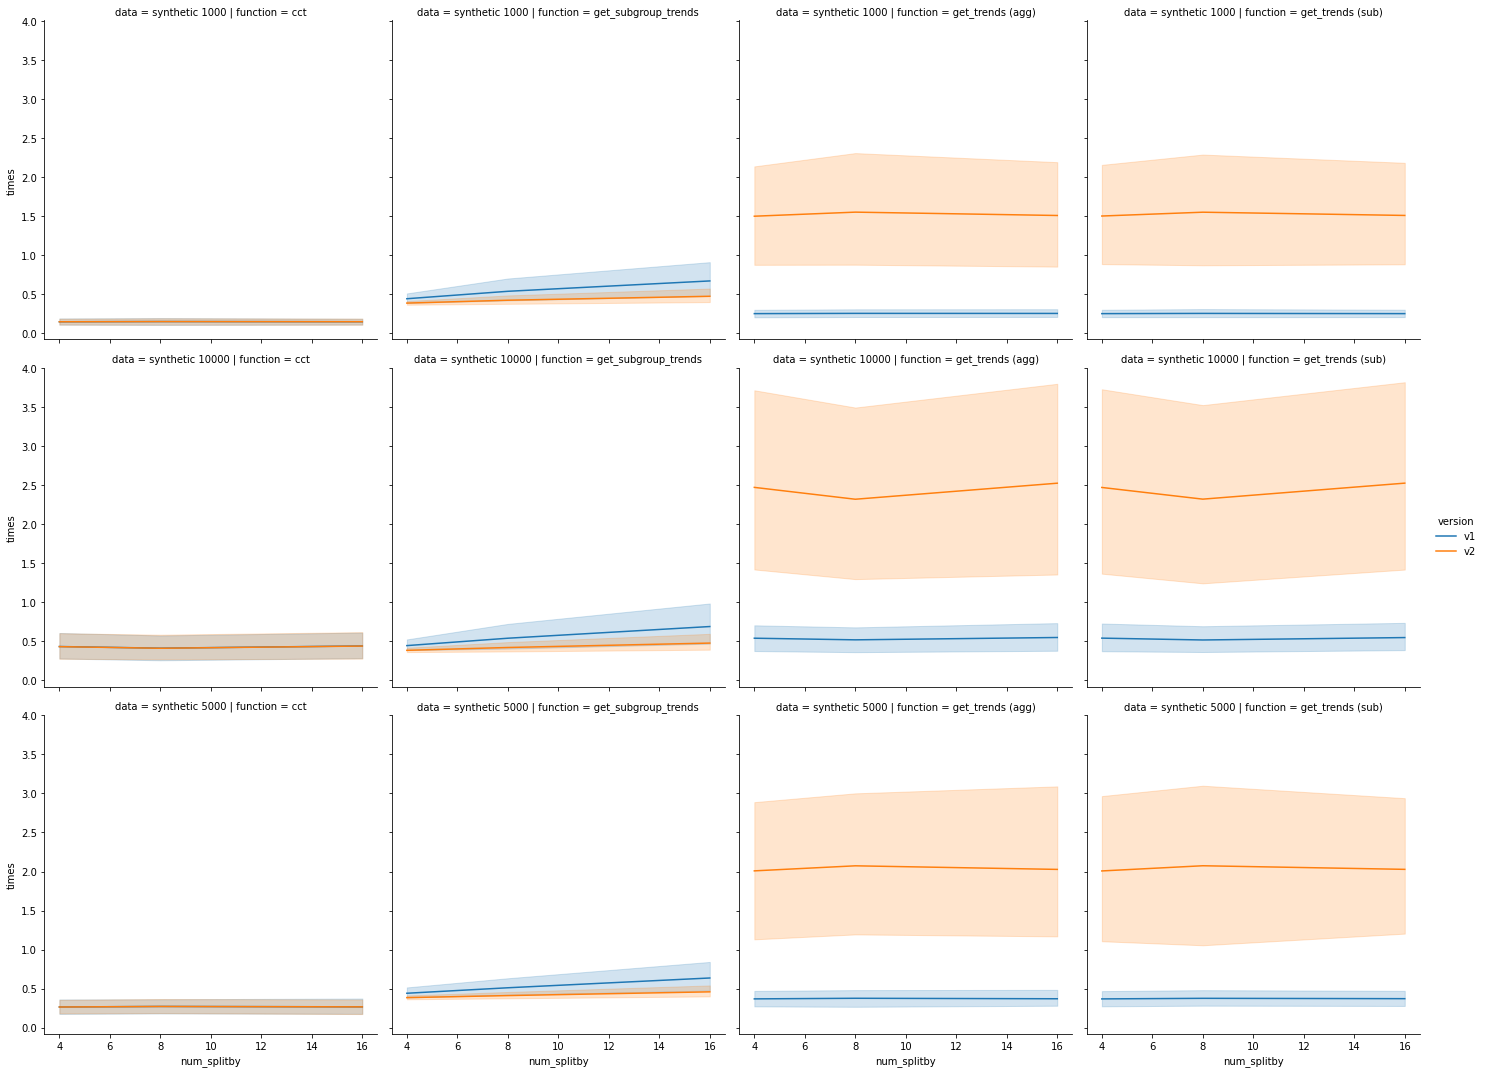

In [13]:
sns.relplot(data=data_mean, x='num_splitby', y='times', kind='line', col='function', row='data', hue='version')

In [4]:
vars_data=pd.read_csv('data/vars_data')
vars_data=vars_data.drop(labels=['Unnamed: 0'], axis=1)

In [13]:
vars_data['dep:indep']=vars_data['dependent']+(vars_data['independent'])*-1

In [14]:
vars_data

,times,data,function,trial,version,independent,dependent,dep:indep
0,0.190346,synthetic 1000,cct,0,v1,2,2,0
1,0.171242,synthetic 1000,cct,1,v1,2,2,0
2,0.177055,synthetic 1000,cct,2,v1,2,2,0
3,0.173933,synthetic 1000,cct,3,v1,2,2,0
4,0.165573,synthetic 1000,cct,4,v1,2,2,0
...,...,...,...,...,...,...,...,...
7995,12.362285,synthetic 1000,get_trends (sub),5,v2,20,20,0
7996,13.186259,synthetic 1000,get_trends (sub),6,v2,20,20,0
7997,13.927814,synthetic 1000,get_trends (sub),7,v2,20,20,0
7998,12.258961,synthetic 1000,get_trends (sub),8,v2,20,20,0


In [15]:
vars_mean=vars_data.groupby(['function', 'version', 'data', 'independent', 'dependent']).mean()
vars_mean=vars_mean.reset_index()
vars_mean

,function,version,data,independent,dependent,times,trial,dep:indep
0,cct,v1,synthetic 1000,2,2,0.173737,4.5,0.0
1,cct,v1,synthetic 1000,2,4,0.209446,4.5,2.0
2,cct,v1,synthetic 1000,2,6,0.246999,4.5,4.0
3,cct,v1,synthetic 1000,2,8,0.314753,4.5,6.0
4,cct,v1,synthetic 1000,2,10,0.267802,4.5,8.0
...,...,...,...,...,...,...,...,...
795,get_trends (sub),v2,synthetic 1000,20,12,7.420464,4.5,-8.0
796,get_trends (sub),v2,synthetic 1000,20,14,8.562204,4.5,-6.0
797,get_trends (sub),v2,synthetic 1000,20,16,10.108845,4.5,-4.0
798,get_trends (sub),v2,synthetic 1000,20,18,11.292182,4.5,-2.0


The following graphs use different levels of dependent and independent data to see how source code compares withoptmised code. The dep:indep variable shows the difference between dependent and independent varaiables for any given trial. negetiv evalues mean there are more independent variables hwile positive means there are more dependent variables. a value of zero means there is an equal number of dependent and independent variables

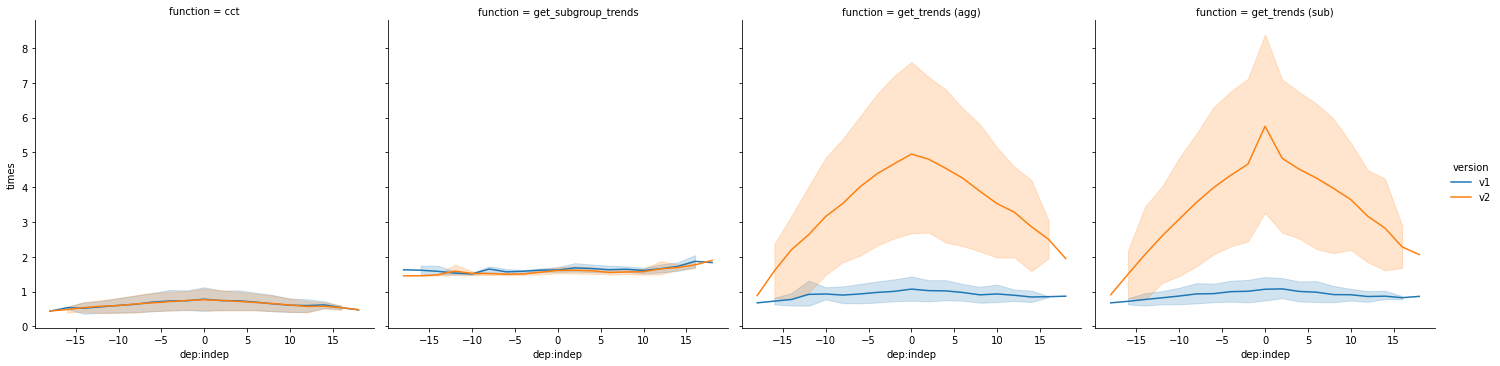

In [16]:
sns.relplot(data=vars_mean, x='dep:indep', y='times', kind='line', col='function', hue='version')

In [48]:
data=pd.read_csv(r'data\all_data')

In [49]:
data_1000=data[data['data']=='synthetic 1000']

In [50]:
data_1000

,Unnamed: 0,times,data,function,trial,version,number_cluster,num_splitby,independent,dependent
0,0,0.360980,synthetic 1000,cct,0,v1,2,4,5,5
1,1,0.265732,synthetic 1000,cct,1,v1,2,4,5,5
2,2,0.250074,synthetic 1000,cct,2,v1,2,4,5,5
3,3,0.242783,synthetic 1000,cct,3,v1,2,4,5,5
4,4,0.251419,synthetic 1000,cct,4,v1,2,4,5,5
...,...,...,...,...,...,...,...,...,...,...
58315,75,18.590375,synthetic 1000,get_trends (sub),5,v2,32,16,25,25
58316,76,18.520664,synthetic 1000,get_trends (sub),6,v2,32,16,25,25
58317,77,18.867616,synthetic 1000,get_trends (sub),7,v2,32,16,25,25
58318,78,18.902312,synthetic 1000,get_trends (sub),8,v2,32,16,25,25


In [51]:
data_1000['dep:indep']=data_1000['independent']+(data['dependent']*-1)

<ipython-input-51-2d8da6165d96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1000['dep:indep']=data_1000['independent']+(data['dependent']*-1)


In [52]:
data_1000=data_1000.groupby(['function', 'version', 'data', 'dependent', 'independent', 'number_cluster', 'num_splitby']).mean()
data_1000=data_1000.reset_index()


In [53]:
data_1000

,function,version,data,dependent,independent,number_cluster,num_splitby,Unnamed: 0,times,trial,dep:indep
0,cct,v1,synthetic 1000,5,5,2,4,4.5,0.274921,4.5,0.0
1,cct,v1,synthetic 1000,5,5,2,8,44.5,0.306038,4.5,0.0
2,cct,v1,synthetic 1000,5,5,2,16,84.5,0.284857,4.5,0.0
3,cct,v1,synthetic 1000,5,5,4,4,3004.5,0.248315,4.5,0.0
4,cct,v1,synthetic 1000,5,5,4,8,3044.5,0.240482,4.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2995,get_trends (sub),v2,synthetic 1000,25,25,16,8,74.5,18.705788,4.5,0.0
2996,get_trends (sub),v2,synthetic 1000,25,25,16,16,74.5,18.747249,4.5,0.0
2997,get_trends (sub),v2,synthetic 1000,25,25,32,4,74.5,19.326421,4.5,0.0
2998,get_trends (sub),v2,synthetic 1000,25,25,32,8,74.5,19.238972,4.5,0.0


In [54]:
clus_2=data_1000[data_1000['number_cluster']==2]

In [55]:
clus_2

,function,version,data,dependent,independent,number_cluster,num_splitby,Unnamed: 0,times,trial,dep:indep
0,cct,v1,synthetic 1000,5,5,2,4,4.5,0.274921,4.5,0.0
1,cct,v1,synthetic 1000,5,5,2,8,44.5,0.306038,4.5,0.0
2,cct,v1,synthetic 1000,5,5,2,16,84.5,0.284857,4.5,0.0
15,cct,v1,synthetic 1000,5,10,2,4,124.5,0.460309,4.5,5.0
16,cct,v1,synthetic 1000,5,10,2,8,164.5,0.355039,4.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2971,get_trends (sub),v2,synthetic 1000,25,20,2,8,2874.5,15.463146,4.5,-5.0
2972,get_trends (sub),v2,synthetic 1000,25,20,2,16,2914.5,15.543796,4.5,-5.0
2985,get_trends (sub),v2,synthetic 1000,25,25,2,4,2954.5,19.149236,4.5,0.0
2986,get_trends (sub),v2,synthetic 1000,25,25,2,8,2994.5,19.254366,4.5,0.0


# Varience in dependent independent vars.

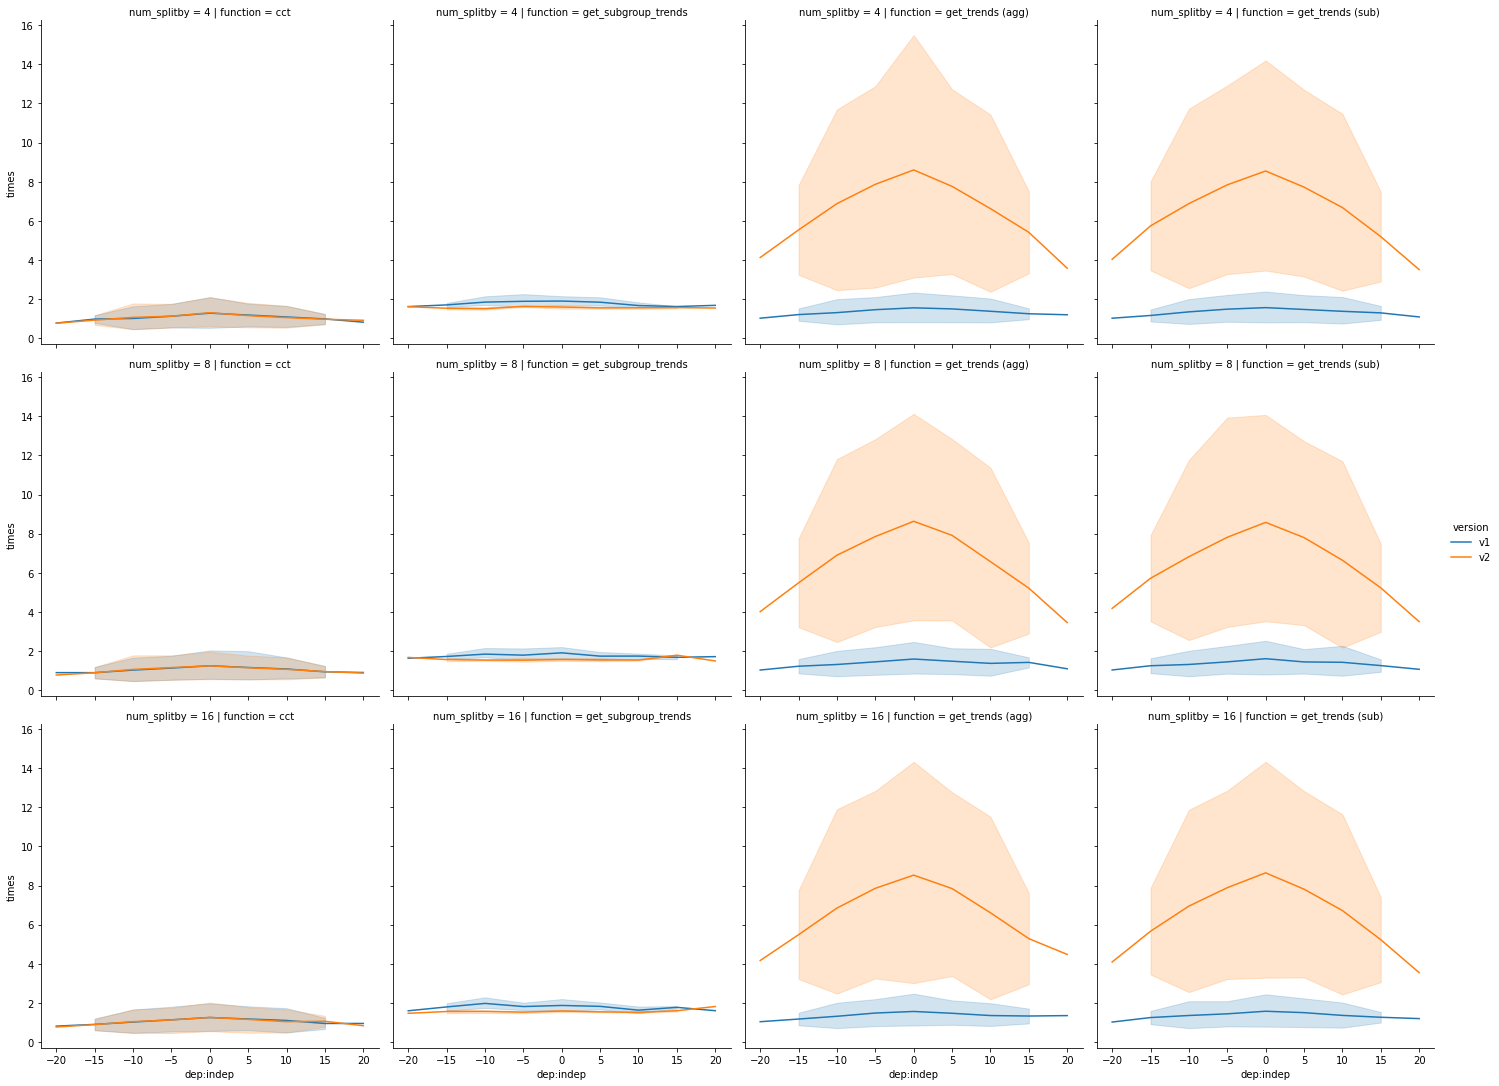

In [56]:
sns.relplot(data=clus_2, x='dep:indep', y='times', kind='line', col='function', hue='version', row='num_splitby')

In [57]:
splitby_4=data_1000[data_1000['num_splitby']==4]

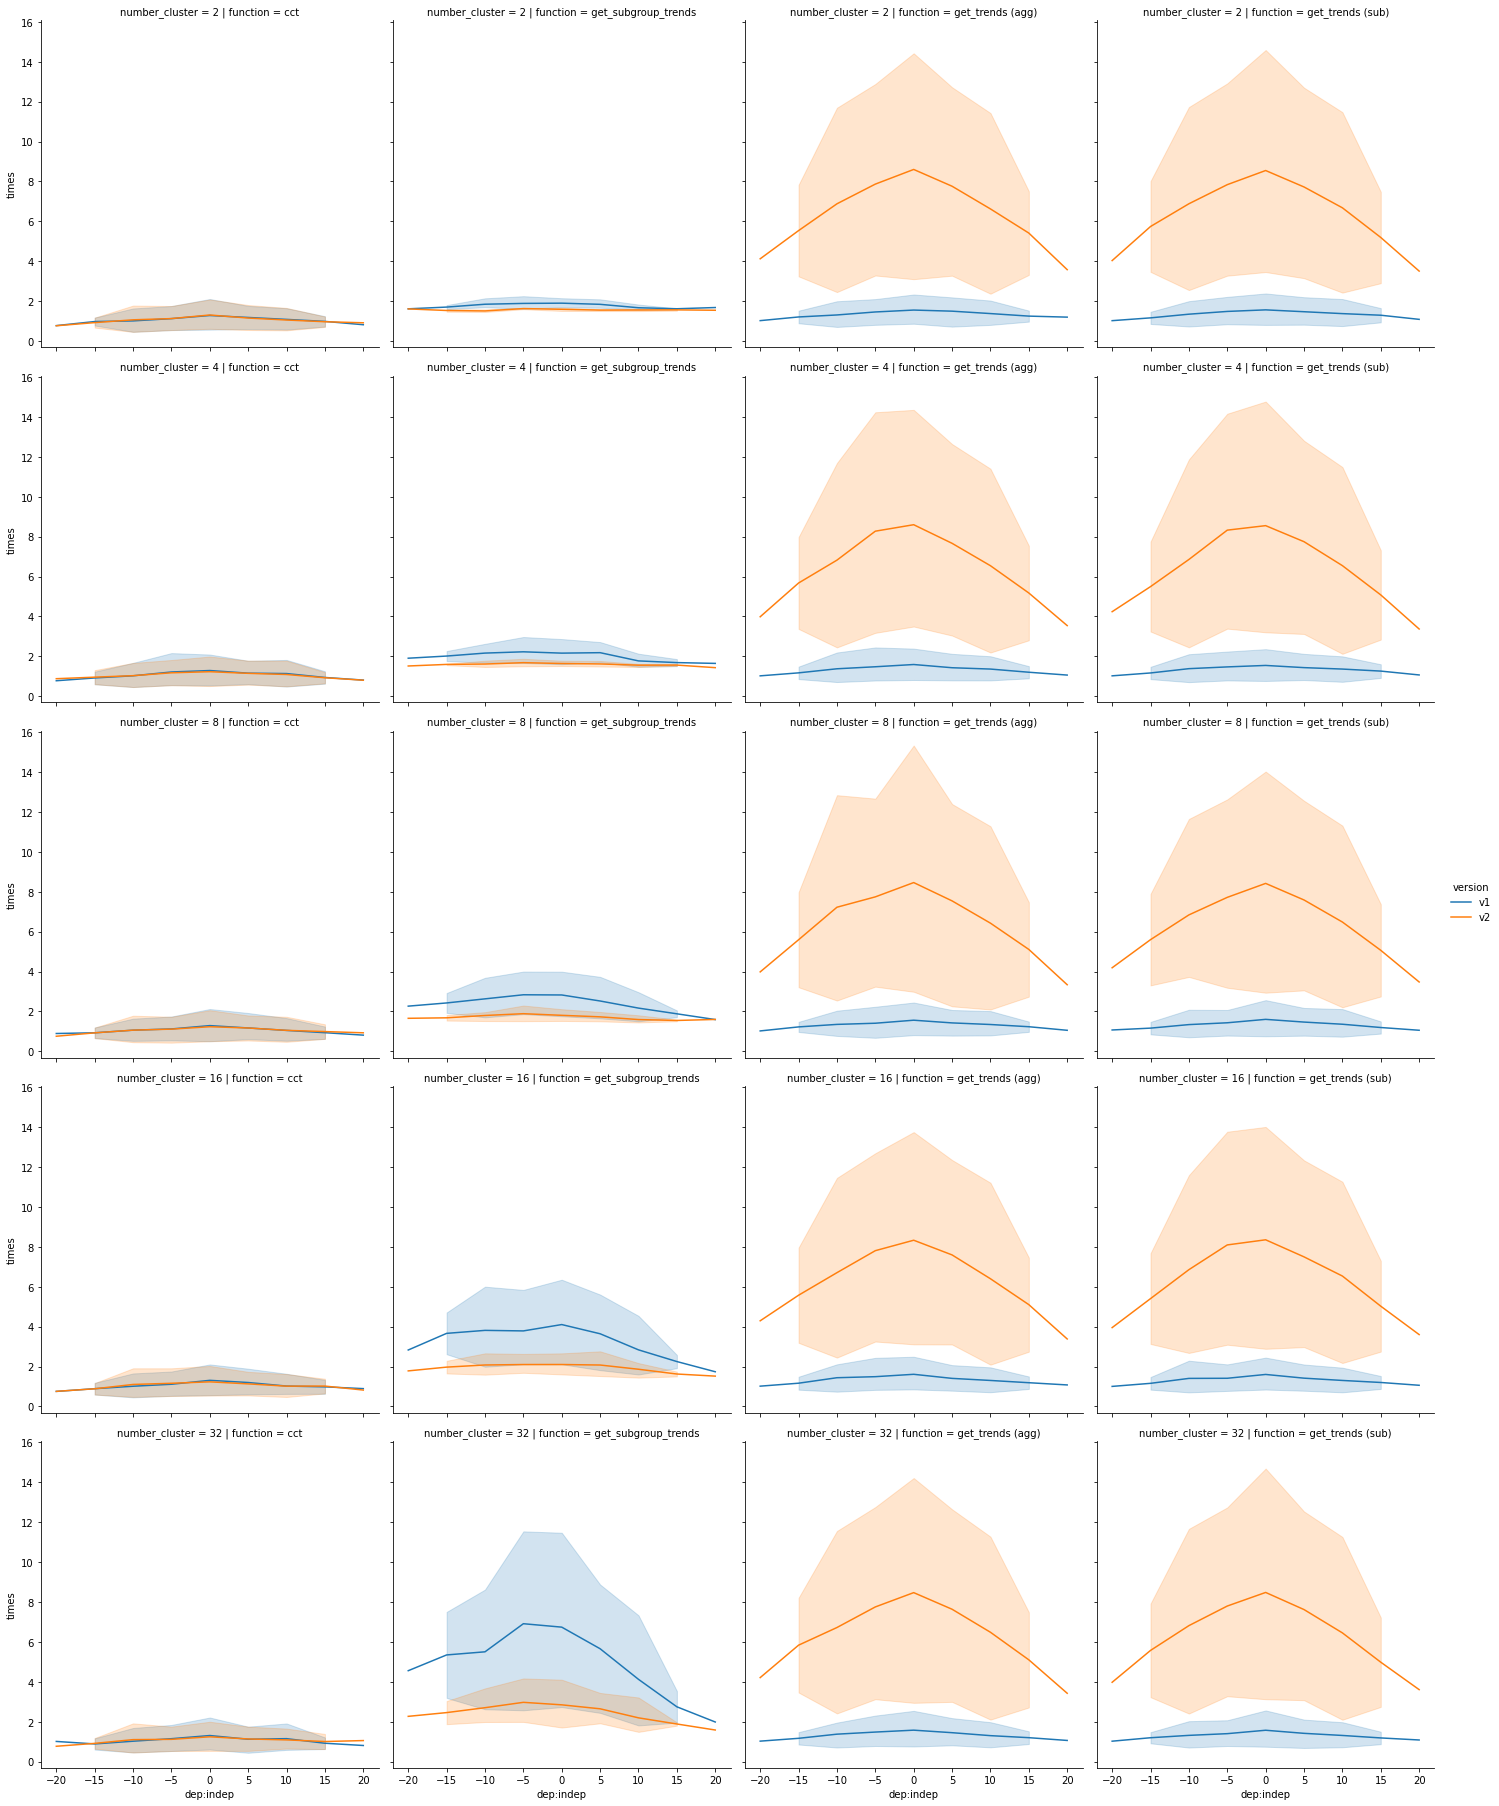

In [58]:
sns.relplot(data=splitby_4, x='dep:indep', y='times', kind='line', col='function', hue='version', row='number_cluster')